In [1]:
import  os
import  pandas as pd
from    tqdm import tqdm
import  numpy as np
from    multiprocessing import get_context as context
from    matplotlib import pyplot as plt
%matplotlib inline

# Read the files

# Parameters


header      = ['EventID','TrackID','Particle','EnergyDeposited','XPosition','YPosition','ZPosition','LocalTime','Volume', 'Initial Energy', 'Origin Volume', 'MigrantID','ParentID']
PROCESSES   = os.cpu_count()-1
Pool        = context("fork").Pool

# Find the files
foldername  = f'../build/output'
os.system(f'rm -rf ../build/output/.ipynb_checkpoints')
filenames   = os.listdir(foldername)

print(f'Found {len(filenames)} data files in {foldername}')

def parallel(function):
    def inner(input_array):
        # Parallelize excecution them
        with Pool(PROCESSES) as pool:
            output = list(tqdm(pool.imap(function, input_array),total=len(input_array)))
        return output 
    return inner

# Function to load a single file
def loadfile(filename):
    df = pd.read_csv(os.path.join(foldername,filename),skiprows=17,names=header)
    df.insert(0, 'Filename', filename)
    return df

Found 19 data files in ../build/output


# emission spectrum

In [2]:
data = pd.concat([loadfile(f) for f in filenames])
data

,Filename,EventID,TrackID,Particle,EnergyDeposited,XPosition,YPosition,ZPosition,LocalTime,Volume,Initial Energy,Origin Volume,MigrantID,ParentID
0,TES-run0-rank8_nt_hits.csv,0,1,La138,0.000000,-8.57428,34.1893,25.5601,0.000000e+00,crystal3_PV,0.000000,crystal3_PV,-1,0
1,TES-run0-rank8_nt_hits.csv,0,6,nu_e,0.000000,-4.50000,41.9497,27.1720,2.972700e-02,crystal3_PV,266.695000,crystal3_PV,-1,1
2,TES-run0-rank8_nt_hits.csv,0,5,Ba138[1435.816],0.000000,-8.57428,34.1893,25.5601,0.000000e+00,crystal3_PV,0.000277,crystal3_PV,-1,1
3,TES-run0-rank8_nt_hits.csv,0,8,gamma,0.000000,-4.50000,29.1613,25.6784,2.159040e-02,crystal3_PV,1435.810000,crystal3_PV,-1,5
4,TES-run0-rank8_nt_hits.csv,0,8,gamma,0.000000,17.10390,2.5000,26.3060,1.360740e-01,crystal2_PV,1435.810000,crystal3_PV,-1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134128,TES-run0-rank4_nt_hits.csv,52630,11,e-,0.025167,-16.16640,17.6062,12.0575,1.202230e-05,crystal3_PV,25.936600,crystal3_PV,-1,3
1134129,TES-run0-rank4_nt_hits.csv,52630,11,e-,0.000000,-16.16640,17.6062,12.0575,1.202230e-05,crystal3_PV,25.936600,crystal3_PV,-1,3
1134130,TES-run0-rank4_nt_hits.csv,52630,2,e-,0.000428,-16.22440,17.4745,12.0272,6.781930e-07,crystal3_PV,5.243270,crystal3_PV,-1,1
1134131,TES-run0-rank4_nt_hits.csv,52630,2,e-,0.004815,-16.22440,17.4744,12.0272,1.909510e-06,crystal3_PV,5.243270,crystal3_PV,-1,1


In [3]:
crystal1 = data[data['Volume'] == 'crystal1_PV']
crystal2 = data[data['Volume'] == 'crystal2_PV']
crystal3 = data[data['Volume'] == 'crystal3_PV']
crystal4 = data[data['Volume'] == 'crystal4_PV']

In [4]:
gamma = crystal3[crystal3.Particle == 'gamma']
gamma

,Filename,EventID,TrackID,Particle,EnergyDeposited,XPosition,YPosition,ZPosition,LocalTime,Volume,Initial Energy,Origin Volume,MigrantID,ParentID
3,TES-run0-rank8_nt_hits.csv,0,8,gamma,0.000000,-4.50000,29.1613,25.67840,0.021590,crystal3_PV,1435.81000,crystal3_PV,-1,5
6,TES-run0-rank8_nt_hits.csv,0,4,gamma,0.005894,-8.48078,34.2386,25.44870,0.000512,crystal3_PV,31.81870,crystal3_PV,-1,1
10,TES-run0-rank8_nt_hits.csv,0,3,gamma,0.000834,-8.57264,34.1910,25.56100,0.000008,crystal3_PV,4.82365,crystal3_PV,-1,1
24,TES-run0-rank8_nt_hits.csv,1,6,gamma,0.000279,-6.42292,14.5219,27.06310,0.075102,crystal3_PV,788.74200,crystal3_PV,-1,2
25,TES-run0-rank8_nt_hits.csv,1,6,gamma,0.000012,-5.68416,14.2802,24.91950,0.082709,crystal3_PV,788.74200,crystal3_PV,-1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134094,TES-run0-rank4_nt_hits.csv,52629,19,gamma,0.006269,-7.03581,30.0916,8.44771,0.000168,crystal3_PV,11.83290,crystal3_PV,-1,3
1134107,TES-run0-rank4_nt_hits.csv,52630,7,gamma,0.000847,-17.25980,27.5030,9.70210,0.034512,crystal3_PV,1435.81000,crystal3_PV,-1,4
1134108,TES-run0-rank4_nt_hits.csv,52630,7,gamma,0.000000,-21.59870,32.2517,4.50000,0.062107,crystal3_PV,1435.81000,crystal3_PV,-1,4
1134121,TES-run0-rank4_nt_hits.csv,52630,9,gamma,0.001365,-17.21490,27.6479,9.66964,0.000017,crystal3_PV,4.63652,NaN,-1,8


In [5]:
emitted_gamma = gamma.groupby(['Filename', 'EventID'])['Initial Energy'].max().reset_index()
emitted_gamma

,Filename,EventID,Initial Energy
0,TES-run0-rank0_nt_hits.csv,0,788.742
1,TES-run0-rank0_nt_hits.csv,1,1435.810
2,TES-run0-rank0_nt_hits.csv,2,1435.810
3,TES-run0-rank0_nt_hits.csv,3,1435.810
4,TES-run0-rank0_nt_hits.csv,4,1435.810
...,...,...,...
999867,TES-run0-rank9_nt_hits.csv,52626,788.742
999868,TES-run0-rank9_nt_hits.csv,52627,788.742
999869,TES-run0-rank9_nt_hits.csv,52628,788.742
999870,TES-run0-rank9_nt_hits.csv,52629,788.742


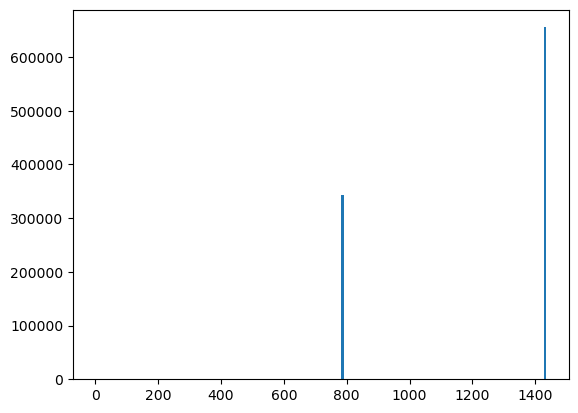

In [6]:
plt.clf()
counts, x, _ = plt.hist(emitted_gamma['Initial Energy'], bins = 200)
plt.show()
bin_centers = []
for index,value in enumerate(x):
    if index == 0: continue
    center = (value + x[index-1])/2
    bin_centers.append(center)

filtered_counts1 = []
filtered_center1 = []

for index, value in enumerate(counts):
    if value > 10**5:
        filtered_counts1.append(value)
        filtered_center1.append(bin_centers[index])

In [7]:
crystal3 = crystal3.sort_values(by=['Filename', 'EventID', 'TrackID','Particle']).reset_index()

In [8]:
crystal3.head(100)

,index,Filename,EventID,TrackID,Particle,EnergyDeposited,XPosition,YPosition,ZPosition,LocalTime,Volume,Initial Energy,Origin Volume,MigrantID,ParentID
0,0,TES-run0-rank0_nt_hits.csv,0,1,La138,0.000000,-17.9581,22.93110,23.0335,0.000000,crystal3_PV,0.000000,crystal3_PV,-1,0
1,10,TES-run0-rank0_nt_hits.csv,0,2,Ce138[788.744],0.000000,-17.9581,22.93110,23.0335,0.000000,crystal3_PV,0.000416,crystal3_PV,-1,1
2,8,TES-run0-rank0_nt_hits.csv,0,3,anti_nu_e,0.000000,-19.4712,21.27910,27.5000,0.016668,crystal3_PV,114.092000,crystal3_PV,-1,1
3,1,TES-run0-rank0_nt_hits.csv,0,4,e-,0.005323,-17.9520,22.93330,23.0320,0.000036,crystal3_PV,143.964000,crystal3_PV,-1,1
4,2,TES-run0-rank0_nt_hits.csv,0,4,e-,0.017737,-17.9427,22.93780,23.0274,0.000097,crystal3_PV,143.964000,crystal3_PV,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,105,TES-run0-rank0_nt_hits.csv,6,5,nu_e,0.000000,-19.4240,7.46029,27.5000,0.012560,crystal3_PV,266.695000,crystal3_PV,-1,1
96,167,TES-run0-rank0_nt_hits.csv,6,6,Ba138,0.000000,-18.7728,8.50881,23.9428,0.000000,crystal3_PV,0.008026,crystal3_PV,-1,4
97,108,TES-run0-rank0_nt_hits.csv,6,7,gamma,0.005484,-22.3318,10.30270,23.6948,0.013320,crystal3_PV,1435.810000,crystal3_PV,-1,4
98,109,TES-run0-rank0_nt_hits.csv,6,7,gamma,0.000012,-19.6758,9.11577,23.2830,0.023121,crystal3_PV,1435.810000,crystal3_PV,-1,4


# separate spectra

In [116]:
# Number of processes (adjust based on CPU availability)
PROCESSES = 19  # You mentioned you have 20 CPUs and can spare 19

# Function to process each file individually (your gamma and e- logic)
def gamma_depositions(filename):
    
    df = loadfile(filename)
    # df = df[df.EnergyDeposited > 0.0]
    df = df[df['Volume'] == 'crystal3_PV']
    df = df.drop(columns=['MigrantID','XPosition','YPosition','ZPosition','LocalTime'])
    df = df[df.Particle.isin(['gamma','e-','e+'])]
    df = df[df.ParentID > 0]
    df.loc[df['Particle'].isin(['e-','e+']), 'TrackID'] = df['ParentID']
    # Step 1: Filter groups that contain the 'gamma' particle
    gamma_groups = df.groupby(['Filename', 'EventID', 'TrackID']).filter(lambda group: 'gamma' in group['Particle'].values)

    # Step 2: Group by Filename, EventID, and TrackID, then sum the EnergyDeposited
    result = gamma_groups.groupby(['Filename', 'EventID', 'TrackID'], as_index=False)['EnergyDeposited'].sum()
    return result

def beta_minus(filename):

    df = loadfile(filename)  # Load the file
    # df = df.iloc[0:100000]
    df = df[df.EnergyDeposited > 0.0]
    df = df[df['Volume'] == 'crystal3_PV']
    df = df.drop(columns=['MigrantID','XPosition','YPosition','ZPosition','LocalTime'])
    df = df[df.Particle == 'e-']
    df = df[df.ParentID == 1]

    return df

def other(filename):

    df = loadfile(filename)
    # df = df[df.EnergyDeposited > 0.0]
    df = df[df['Volume'] == 'crystal3_PV']
    df = df.drop(columns=['MigrantID','XPosition','YPosition','ZPosition','LocalTime'])
    df = df[~((df.Particle == 'e-') & (df.ParentID == 1))]
    # df = df[df.Particle != 'e+']

    df = df[df.Particle.isin(['gamma','e-','e+'])]
    df = df[df.ParentID > 0]
    df.loc[df['Particle'].isin(['e-','e+']), 'TrackID'] = df['ParentID']
    # Step 1: Filter groups that contain the 'gamma' particle
    gamma_groups = df.groupby(['Filename', 'EventID', 'TrackID']).filter(lambda group: 'gamma' not in group['Particle'].values)

    # Step 2: Group by Filename, EventID, and TrackID, then sum the EnergyDeposited
    result = gamma_groups.groupby(['Filename', 'EventID', 'TrackID'], as_index=False)['EnergyDeposited'].sum()
    return result

def positron(filename):

    df = loadfile(filename)
    df = df[df.EnergyDeposited > 0.0]
    df = df[df['Volume'] == 'crystal3_PV']
    df = df.drop(columns=['MigrantID','XPosition','YPosition','ZPosition','LocalTime'])

    df = df[df.Particle == 'e+']
    return df


def total(filename):
    df = loadfile(filename)
    # df = df[df.EnergyDeposited > 0.0]
    df = df[df['Volume'] == 'crystal3_PV']
    df = df.drop(columns=['MigrantID','XPosition','YPosition','ZPosition','LocalTime'])

    # gamma depositions:
    gamma = df[df.ParentID > 0]
    gamma = gamma[gamma.Particle.isin(['gamma','e-','e+'])]
    gamma.loc[df['Particle'].isin(['e-','e+']), 'TrackID'] = gamma['ParentID']
    gamma = gamma.groupby(['Filename', 'EventID', 'TrackID']).filter(lambda group: 'gamma' in group['Particle'].values)
    gamma = gamma.groupby(['Filename', 'EventID','TrackID'], as_index=False)['EnergyDeposited'].sum()
    # gamma.insert(3, 'Particle', 'gamma')

    # beta -
    beta = df[df.Particle == 'e-']
    beta = beta[beta.ParentID == 1]
    beta = beta.groupby(['Filename', 'EventID','TrackID'], as_index=False)['EnergyDeposited'].sum()
    # beta.insert(3, 'Particle', 'beta-')

    # other
    # columns_to_compare = ['Filename', 'EventID','TrackID']
    # other = pd.merge(df, gamma, on=columns_to_compare, how='left', indicator=True)
    # other = other[other['_merge'] == 'left_only'].drop('_merge', axis=1)

    # other = pd.merge(other, beta, on=columns_to_compare, how='left', indicator=True)
    # other = other[other['_merge'] == 'left_only'].drop('_merge', axis=1)
    # other.EnergyDeposited = other.EnergyDeposited
    # other = other.drop(columns = ['EnergyDeposited_x'])
    # other = other.groupby(['Filename', 'EventID','TrackID'], as_index=False)['EnergyDeposited'].sum()


    # df = df[df.EnergyDeposited > 0.0]
    not_beta = df[~((df.Particle == 'e-') & (df.ParentID == 1))]
    # df = df[df.Particle != 'e+']

    not_beta_or_gamma = not_beta[not_beta.Particle.isin(['gamma','e-','e+'])]
    not_beta_or_gamma = not_beta_or_gamma[not_beta_or_gamma.ParentID > 0]
    not_beta_or_gamma.loc[not_beta_or_gamma['Particle'].isin(['e-','e+']), 'TrackID'] = not_beta_or_gamma['ParentID']
    not_beta_or_gamma = not_beta_or_gamma.groupby(['Filename', 'EventID', 'TrackID']).filter(lambda group: 'gamma' not in group['Particle'].values)
    other = not_beta_or_gamma.groupby(['Filename', 'EventID', 'TrackID'], as_index=False)['EnergyDeposited'].sum()

    gamma = gamma.groupby(['Filename', 'EventID'], as_index=False)['EnergyDeposited'].sum()
    beta  = beta.groupby(['Filename', 'EventID'], as_index=False)['EnergyDeposited'].sum()
    other = other.groupby(['Filename', 'EventID'], as_index=False)['EnergyDeposited'].sum()

    # Merge gamma and beta on 'filename' and 'eventid'
    merged_df = pd.merge(gamma, beta, on=['Filename', 'EventID'], how='outer', suffixes=('_gamma', '_beta'))

    # Merge the result with the 'other' dataframe
    final_df = pd.merge(merged_df, other, on=['Filename', 'EventID'], how='outer')

    # Rename the energy column from 'other' to 'energy_other'
    final_df.rename(columns={'EnergyDeposited_gamma': 'gamma', 'EnergyDeposited_beta': 'beta', 'EnergyDeposited': 'other'}, inplace=True)
    final_df.fillna(0, inplace=True)
    sorted_final_df = final_df.sort_values(by=['Filename', 'EventID']).reset_index(drop=True)

    return sorted_final_df

In [130]:
# beta spectrum 
processFiles        = parallel(beta_minus)
processed           = processFiles(filenames)

data = pd.concat(processed)
spectrum1 = data
spectrum1 = spectrum1.groupby(['Filename', 'EventID'])['EnergyDeposited'].sum().reset_index()
spectrum1['EnergyDeposited'] = spectrum1['EnergyDeposited'] * 1000.0

100%|██████████| 19/19 [00:03<00:00,  5.57it/s]


In [134]:
spectrum1.to_csv('beta_spectrum.csv',index=False)

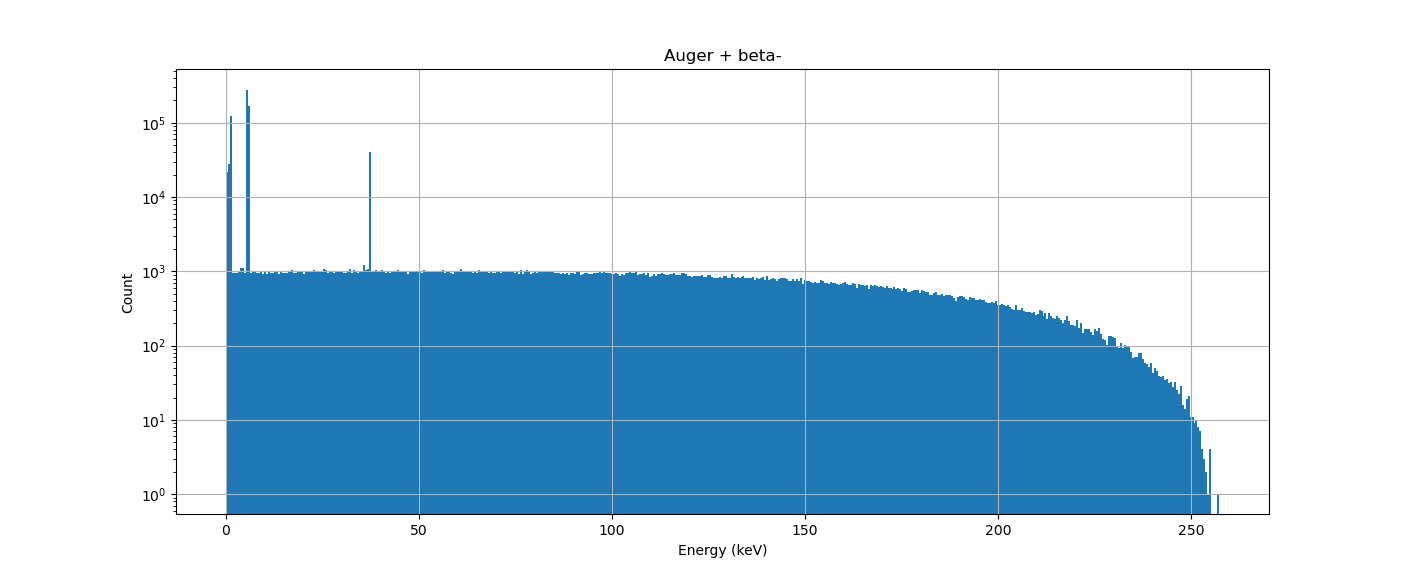

In [133]:
plt.clf()
plt.hist(spectrum1.EnergyDeposited, bins= 500)
plt.yscale('log')
plt.xlabel('Energy (keV)')
plt.ylabel('Count')
plt.title('Auger + beta-')
plt.grid()
plt.show()

In [135]:
# gamma spectrum 
processFiles        = parallel(gamma_depositions)
processed           = processFiles(filenames)

data = pd.concat(processed)
spectrum1 = data
spectrum1 = spectrum1.groupby(['Filename', 'EventID'])['EnergyDeposited'].sum().reset_index()
spectrum1['EnergyDeposited'] = spectrum1['EnergyDeposited'] * 1000.0

100%|██████████| 19/19 [00:19<00:00,  1.03s/it]


In [136]:
spectrum1.to_csv('gamma_spectrum.csv',index=False)

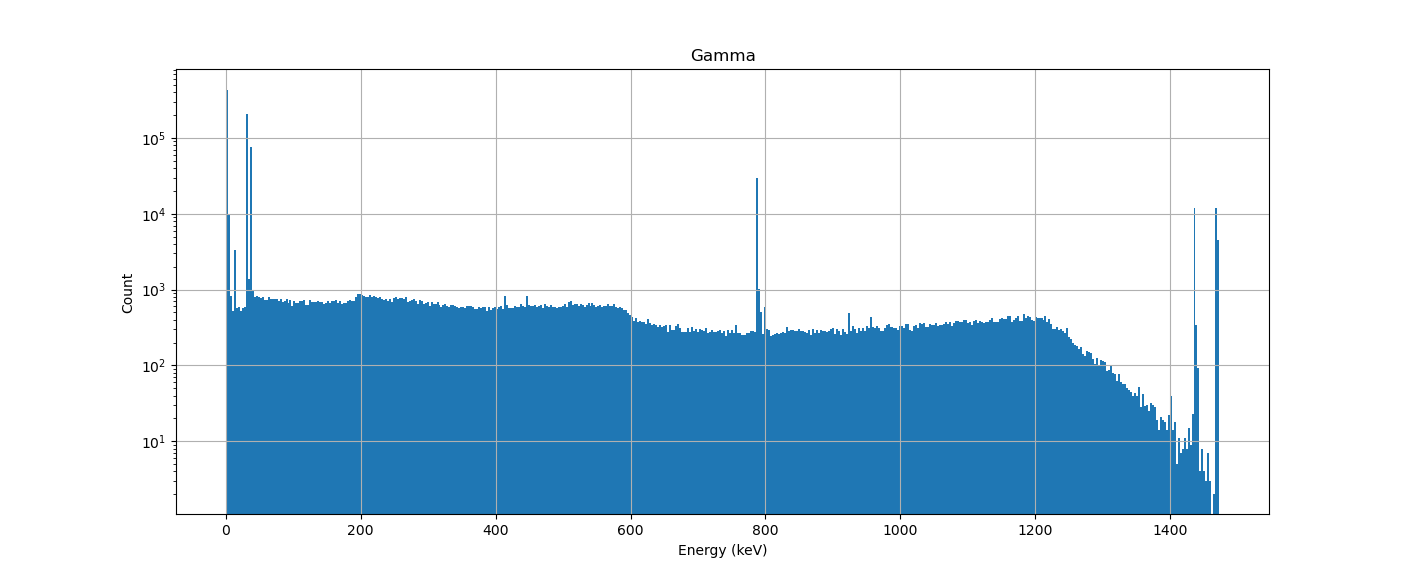

In [137]:
plt.clf()
plt.hist(spectrum1.EnergyDeposited, bins= 500)
plt.yscale('log')
plt.xlabel('Energy (keV)')
plt.ylabel('Count')
plt.title('Gamma')
plt.grid()
plt.show()

In [138]:
# other spectrum 
processFiles        = parallel(other)
processed           = processFiles(filenames)

data = pd.concat(processed)
spectrum1 = data
spectrum1 = spectrum1.groupby(['Filename', 'EventID'])['EnergyDeposited'].sum().reset_index()
spectrum1['EnergyDeposited'] = spectrum1['EnergyDeposited'] * 1000.0

100%|██████████| 19/19 [00:14<00:00,  1.34it/s]


In [139]:
spectrum1.to_csv('other_spectrum.csv',index=False)

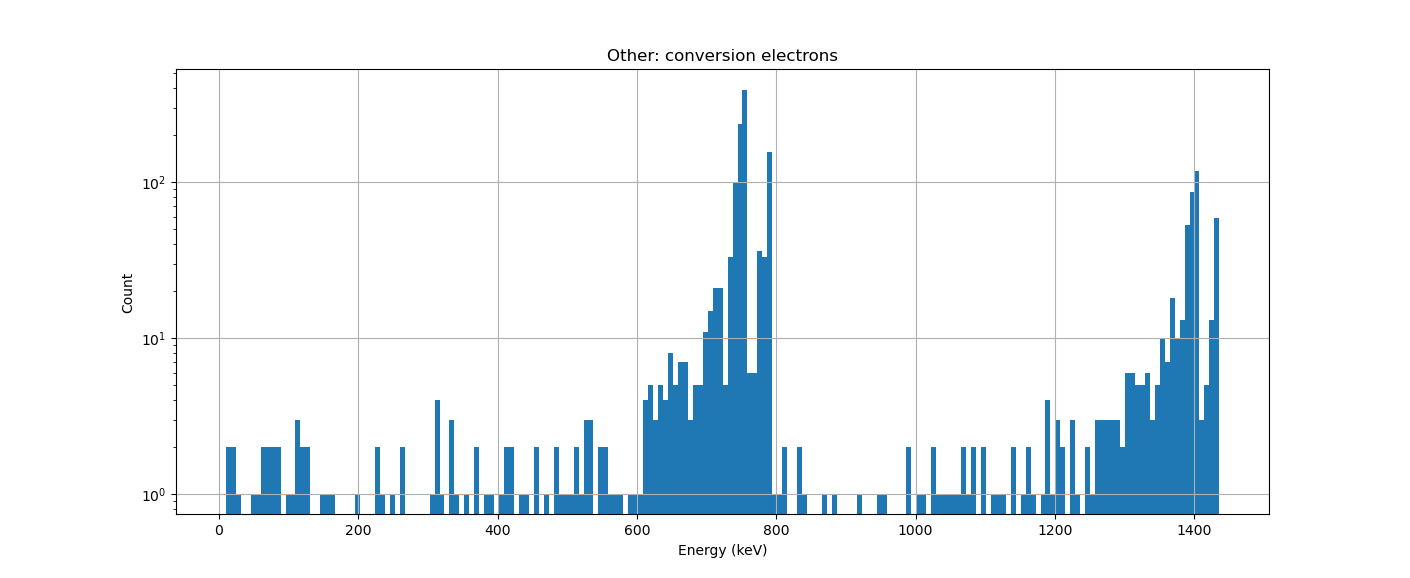

In [140]:
plt.clf()
plt.hist(spectrum1.EnergyDeposited, bins= 200)
plt.yscale('log')
plt.xlabel('Energy (keV)')
plt.ylabel('Count')
plt.title('Other: conversion electrons')
plt.grid()
plt.show()

In [117]:
# total spectrum 
processFiles        = parallel(total)
processed           = processFiles(filenames)

data = pd.concat(processed)

total_spectrum = data
total_spectrum.gamma = total_spectrum.gamma * 1000
total_spectrum.beta = total_spectrum.beta * 1000
total_spectrum.other = total_spectrum.other * 1000
total_spectrum['total'] = total_spectrum['gamma'] + total_spectrum['beta'] + total_spectrum['other']
total_spectrum

100%|██████████| 19/19 [00:30<00:00,  1.58s/it]


,Filename,EventID,gamma,beta,other,total
0,TES-run0-rank8_nt_hits.csv,0,36.642290,0.806671,0.0,37.448961
1,TES-run0-rank8_nt_hits.csv,1,671.042060,54.816620,0.0,725.858680
2,TES-run0-rank8_nt_hits.csv,2,0.000000,5.960884,0.0,5.960884
3,TES-run0-rank8_nt_hits.csv,3,0.000000,5.630365,0.0,5.630365
4,TES-run0-rank8_nt_hits.csv,4,1435.807480,5.960910,0.0,1441.768390
...,...,...,...,...,...,...
52626,TES-run0-rank4_nt_hits.csv,52626,32.205618,5.243523,0.0,37.449141
52627,TES-run0-rank4_nt_hits.csv,52627,0.000000,1.273430,0.0,1.273430
52628,TES-run0-rank4_nt_hits.csv,52628,0.000000,5.960723,0.0,5.960723
52629,TES-run0-rank4_nt_hits.csv,52629,32.205646,5.243284,0.0,37.448930


In [142]:
total_spectrum.to_csv('total_spectrum.csv',index=False)

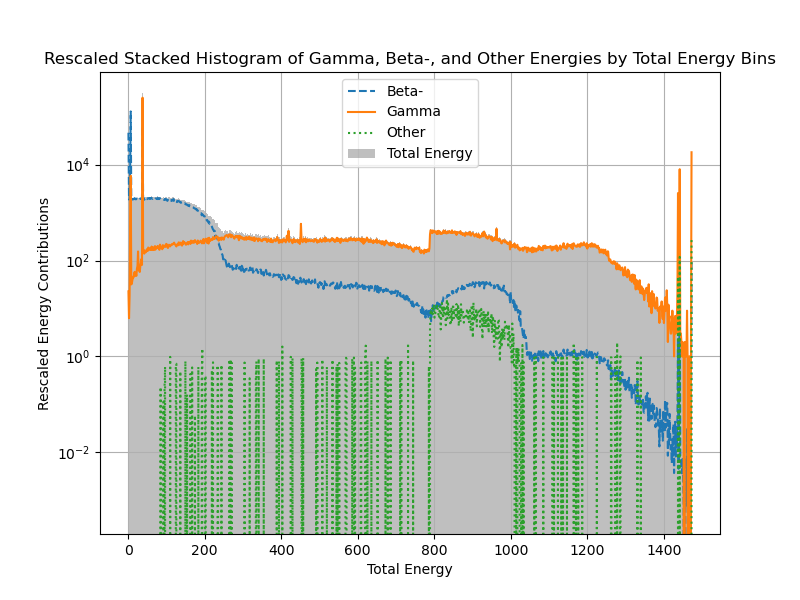

In [121]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of bins based on the total histogram
bins = 1000
bin_edges = np.histogram_bin_edges(total_spectrum['total'], bins=bins)

# Calculate the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Create the histogram data for gamma, beta, and other using total binning
gamma_hist, _ = np.histogram(total_spectrum['total'], bins=bin_edges, weights=total_spectrum['gamma'])
beta_hist, _ = np.histogram(total_spectrum['total'], bins=bin_edges, weights=total_spectrum['beta'])
other_hist, _ = np.histogram(total_spectrum['total'], bins=bin_edges, weights=total_spectrum['other'])

# Total histogram to normalize the contributions
total_hist, _ = np.histogram(total_spectrum['total'], bins=bin_edges)

# Avoid division by zero: mask where total contributions are zero
mask = (gamma_hist + beta_hist + other_hist) > 0

# Rescale the histograms
gamma_scaled = np.zeros_like(gamma_hist)
beta_scaled = np.zeros_like(beta_hist)
other_scaled = np.zeros_like(other_hist)

gamma_scaled[mask] = (gamma_hist[mask] / (gamma_hist[mask] + beta_hist[mask] + other_hist[mask])) * total_hist[mask]
beta_scaled[mask] = (beta_hist[mask] / (gamma_hist[mask] + beta_hist[mask] + other_hist[mask])) * total_hist[mask]
other_scaled[mask] = (other_hist[mask] / (gamma_hist[mask] + beta_hist[mask] + other_hist[mask])) * total_hist[mask]

# Plot the data using the calculated bin centers
plt.figure(figsize=(8, 6))

# Plot the stacked histograms using bin centers
plt.plot(bin_centers, beta_scaled, label='Beta-', linestyle='--')
plt.plot(bin_centers, gamma_scaled, label='Gamma', linestyle='-')
plt.plot(bin_centers, other_scaled, label='Other', linestyle=':')

# Main histogram plot
plt.hist(total_spectrum['total'], bins=bin_edges, alpha=0.5, label='Total Energy', color='gray')

# Plot settings
plt.title('Rescaled Stacked Histogram of Gamma, Beta-, and Other Energies by Total Energy Bins')
plt.xlabel('Total Energy')
plt.ylabel('Rescaled Energy Contributions')
plt.yscale('log')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

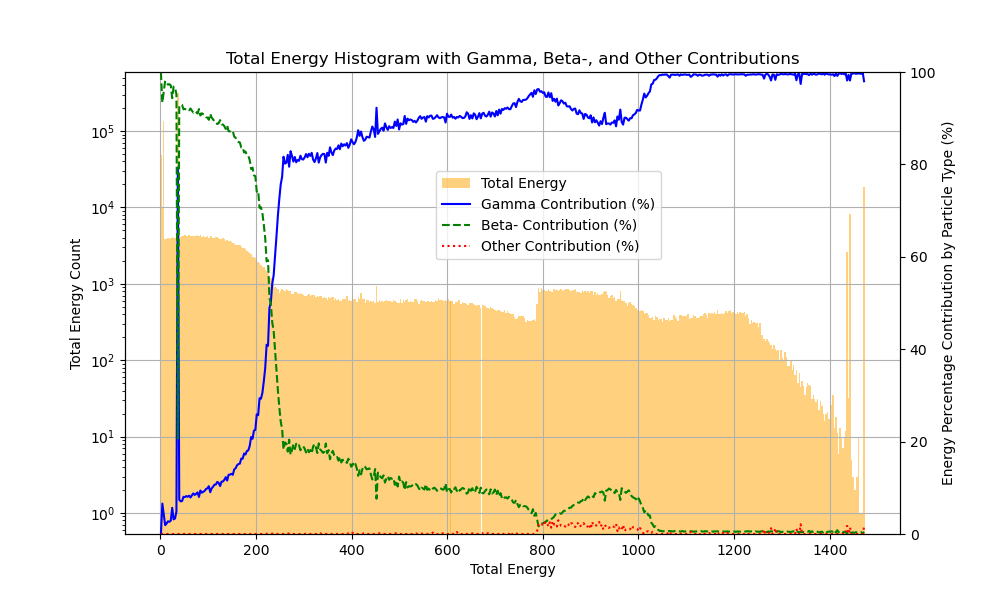

In [143]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of bins
bins = 500
bin_edges = np.histogram_bin_edges(total_spectrum['total'], bins=bins)

# Calculate the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Create histograms for total energy, gamma, beta, and other contributions
gamma_hist, _ = np.histogram(total_spectrum['total'], bins=bin_edges, weights=total_spectrum['gamma'])
beta_hist, _ = np.histogram(total_spectrum['total'], bins=bin_edges, weights=total_spectrum['beta'])
other_hist, _ = np.histogram(total_spectrum['total'], bins=bin_edges, weights=total_spectrum['other'])
total_hist, _ = np.histogram(total_spectrum['total'], bins=bin_edges)

# Avoid division by zero using a mask
mask = (gamma_hist + beta_hist + other_hist) > 0

# Rescale the histograms
gamma_scaled = np.zeros_like(gamma_hist)
beta_scaled = np.zeros_like(beta_hist)
other_scaled = np.zeros_like(other_hist)

gamma_scaled[mask] = (gamma_hist[mask] / (gamma_hist[mask] + beta_hist[mask] + other_hist[mask])) * total_hist[mask]
beta_scaled[mask] = (beta_hist[mask] / (gamma_hist[mask] + beta_hist[mask] + other_hist[mask])) * total_hist[mask]
other_scaled[mask] = (other_hist[mask] / (gamma_hist[mask] + beta_hist[mask] + other_hist[mask])) * total_hist[mask]

# Calculate the percentage contributions for gamma, beta, and other
gamma_percent = np.zeros_like(gamma_hist)
beta_percent = np.zeros_like(beta_hist)
other_percent = np.zeros_like(other_hist)

mask_percent = (gamma_hist + beta_hist + other_hist) > 0
gamma_percent[mask_percent] = gamma_hist[mask_percent] / (gamma_hist[mask_percent] + beta_hist[mask_percent] + other_hist[mask_percent])
beta_percent[mask_percent] = beta_hist[mask_percent] / (gamma_hist[mask_percent] + beta_hist[mask_percent] + other_hist[mask_percent])
other_percent[mask_percent] = other_hist[mask_percent] / (gamma_hist[mask_percent] + beta_hist[mask_percent] + other_hist[mask_percent])

# Plotting the combined figure
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the total energy histogram on the primary y-axis
hist_handle = ax1.hist(
    total_spectrum['total'], bins=bin_edges, color='orange', alpha=0.5, label='Total Energy'
)
ax1.set_xlabel('Total Energy')
ax1.set_ylabel('Total Energy Count')
ax1.set_yscale('log')
ax1.grid(True)

# Create a secondary y-axis for the percentage contributions
ax2 = ax1.twinx()

# Plot the percentage contributions on the secondary y-axis
gamma_handle, = ax2.plot(
    bin_centers, gamma_percent * 100, label='Gamma Contribution (%)', linestyle='-', color='blue'
)
beta_handle, = ax2.plot(
    bin_centers, beta_percent * 100, label='Beta- Contribution (%)', linestyle='--', color='green'
)
other_handle, = ax2.plot(
    bin_centers, other_percent * 100, label='Other Contribution (%)', linestyle=':', color='red'
)

ax2.set_ylabel('Energy Percentage Contribution by Particle Type (%)')
ax2.set_ylim(0, 100)  # Limit to 100% for clarity

# Combine all handles and labels for a single legend
handles = [hist_handle[2][0], gamma_handle, beta_handle, other_handle]
labels = ['Total Energy', 'Gamma Contribution (%)', 'Beta- Contribution (%)', 'Other Contribution (%)']

# Place the legend at the (0.7, 0.7) position using bbox_to_anchor
plt.legend(handles, labels, bbox_to_anchor=(0.7, 0.8))

# Set the title
plt.title('Total Energy Histogram with Gamma, Beta-, and Other Contributions')

# Display the plot
plt.show()


# Looking into things not understood

In [104]:
weird = spectrum1[spectrum1.EnergyDeposited > 263.0]

weird = pd.merge(crystal3, weird, on=['Filename','EventID'], how='inner')
weird.EnergyDeposited_x = weird.EnergyDeposited_x * 1000
weird = weird[weird.Filename == 'TES-run0-rank0_nt_hits.csv']
weird = weird[weird.EventID == 605]
weird = weird.drop(columns=['index','XPosition','YPosition','ZPosition','LocalTime'])

In [105]:
weird

,Filename,EventID,TrackID,Particle,EnergyDeposited_x,Volume,Initial Energy,Origin Volume,MigrantID,ParentID,EnergyDeposited_y
0,TES-run0-rank0_nt_hits.csv,605,1,La138,0.000000,crystal3_PV,0.000000,crystal3_PV,-1,0,854.091353
1,TES-run0-rank0_nt_hits.csv,605,2,Ce138[788.744],0.000000,crystal3_PV,0.000741,crystal3_PV,-1,1,854.091353
2,TES-run0-rank0_nt_hits.csv,605,3,anti_nu_e,0.000000,crystal3_PV,157.973000,crystal3_PV,-1,1,854.091353
3,TES-run0-rank0_nt_hits.csv,605,4,e-,4.009640,crystal3_PV,100.082000,crystal3_PV,-1,1,854.091353
4,TES-run0-rank0_nt_hits.csv,605,4,e-,26.987800,crystal3_PV,100.082000,crystal3_PV,-1,1,854.091353
5,TES-run0-rank0_nt_hits.csv,605,4,e-,28.570400,crystal3_PV,100.082000,crystal3_PV,-1,1,854.091353
6,TES-run0-rank0_nt_hits.csv,605,4,e-,40.252000,crystal3_PV,100.082000,crystal3_PV,-1,1,854.091353
7,TES-run0-rank0_nt_hits.csv,605,4,e-,0.262207,crystal3_PV,100.082000,crystal3_PV,-1,1,854.091353
8,TES-run0-rank0_nt_hits.csv,605,4,e-,0.000000,crystal3_PV,100.082000,crystal3_PV,-1,1,854.091353
9,TES-run0-rank0_nt_hits.csv,605,5,Ce138,0.000000,crystal3_PV,0.005157,crystal3_PV,-1,2,854.091353


In [61]:
weird2 = crystal3[crystal3.Particle.isin(['e+','gamma'])]

In [62]:
weird2.loc[weird2['Particle'].isin(['e+']), 'TrackID'] = weird2['ParentID']

In [63]:
gamma_groups = weird2.groupby(['Filename', 'EventID', 'TrackID']).filter(lambda group: 'gamma' not in group['Particle'].values)

In [66]:
gamma_groups

,index,Filename,EventID,TrackID,Particle,EnergyDeposited,XPosition,YPosition,ZPosition,LocalTime,Volume,Initial Energy,Origin Volume,MigrantID,ParentID


In [64]:
weird2 = weird2.groupby(['Filename', 'EventID'])['MigrantID'].max().reset_index()
weird2 = weird2.drop(columns=['MigrantID'])
weird2 = pd.merge(crystal3, weird2, on=['Filename','EventID'], how='inner')
weird2 = weird2.drop(columns=['index', 'MigrantID','XPosition','YPosition','ZPosition','LocalTime'])
weird2.EnergyDeposited = weird2.EnergyDeposited * 1000

In [65]:
weird2.head(100)

,Filename,EventID,TrackID,Particle,EnergyDeposited,Volume,Initial Energy,Origin Volume,ParentID
0,TES-run0-rank0_nt_hits.csv,0,1,La138,0.000000,crystal3_PV,0.000000,crystal3_PV,0
1,TES-run0-rank0_nt_hits.csv,0,2,Ce138[788.744],0.000000,crystal3_PV,0.000416,crystal3_PV,1
2,TES-run0-rank0_nt_hits.csv,0,3,anti_nu_e,0.000000,crystal3_PV,114.092000,crystal3_PV,1
3,TES-run0-rank0_nt_hits.csv,0,4,e-,5.322860,crystal3_PV,143.964000,crystal3_PV,1
4,TES-run0-rank0_nt_hits.csv,0,4,e-,17.736900,crystal3_PV,143.964000,crystal3_PV,1
5,TES-run0-rank0_nt_hits.csv,0,4,e-,45.771300,crystal3_PV,143.964000,crystal3_PV,1
6,TES-run0-rank0_nt_hits.csv,0,4,e-,19.339400,crystal3_PV,143.964000,crystal3_PV,1
7,TES-run0-rank0_nt_hits.csv,0,4,e-,25.236200,crystal3_PV,143.964000,crystal3_PV,1
8,TES-run0-rank0_nt_hits.csv,0,4,e-,30.557100,crystal3_PV,143.964000,crystal3_PV,1
9,TES-run0-rank0_nt_hits.csv,0,4,e-,0.000000,crystal3_PV,143.964000,crystal3_PV,1


In [26]:
weird3 = spectrum1[spectrum1.EnergyDeposited > 410.0] 
weird3 = weird3[weird3.EnergyDeposited < 415.0]
weird3 = pd.merge(crystal3, weird3, on = ['Filename','EventID'], how = 'inner')
weird3 = weird3.drop(columns=['index', 'MigrantID','XPosition','YPosition','ZPosition','LocalTime'])
weird3.EnergyDeposited_x = weird3.EnergyDeposited_x * 1000

pd.set_option('display.max_rows', 100)
weird3.head(100)

,Filename,EventID,TrackID,Particle,EnergyDeposited_x,Volume,Initial Energy,Origin Volume,ParentID,EnergyDeposited_y
0,TES-run0-rank0_nt_hits.csv,1096,1,La138,0.000000,crystal3_PV,0.000000,crystal3_PV,0,413.79237
1,TES-run0-rank0_nt_hits.csv,1096,2,e-,0.039057,crystal3_PV,5.243460,crystal3_PV,1,413.79237
2,TES-run0-rank0_nt_hits.csv,1096,2,e-,5.204400,crystal3_PV,5.243460,crystal3_PV,1,413.79237
3,TES-run0-rank0_nt_hits.csv,1096,2,e-,0.000000,crystal3_PV,5.243460,crystal3_PV,1,413.79237
4,TES-run0-rank0_nt_hits.csv,1096,3,gamma,5.486000,crystal3_PV,32.205500,crystal3_PV,1,413.79237
5,TES-run0-rank0_nt_hits.csv,1096,4,Ba138[1435.816],0.000000,crystal3_PV,0.000277,crystal3_PV,1,413.79237
6,TES-run0-rank0_nt_hits.csv,1096,5,nu_e,0.000000,crystal3_PV,266.695000,crystal3_PV,1,413.79237
7,TES-run0-rank0_nt_hits.csv,1096,6,Ba138,0.000000,crystal3_PV,0.008026,crystal3_PV,4,413.79237
8,TES-run0-rank0_nt_hits.csv,1096,7,gamma,0.000000,crystal3_PV,1435.810000,crystal3_PV,4,413.79237
9,TES-run0-rank0_nt_hits.csv,1096,8,e-,3.252730,crystal3_PV,127.079000,crystal3_PV,7,413.79237


In [69]:
total = 0

for index,value in enumerate(x[:-1]):
    if value < 1435.0: continue
    # if counts[index] < 1000: continue
    total += counts[index]

print(total)
print(total/filtered_counts1[1])

0
0.0


In [15]:
filtered_counts1

[342997.0, 655277.0]

In [16]:
bin_centers = []
for index,value in enumerate(x):
    if index == 0: continue
    center = (value + x[index-1])/2
    bin_centers.append(center)

In [17]:
plt.plot(bin_centers,counts)

In [18]:
filtered_counts = []
filtered_center = []

for index, value in enumerate(counts):
    if value > 0:
        filtered_counts.append(value)
        filtered_center.append(bin_centers[index])

In [19]:
plt.plot(filtered_center,filtered_counts, '-')

# doing only full depositions

In [20]:
emitted_gamma

,Filename,EventID,Initial Energy
0,TES-run0-rank0_nt_hits.csv,0,788.742
1,TES-run0-rank0_nt_hits.csv,1,1435.810
2,TES-run0-rank0_nt_hits.csv,2,1435.810
3,TES-run0-rank0_nt_hits.csv,3,1435.810
4,TES-run0-rank0_nt_hits.csv,4,1435.810
...,...,...,...
999867,TES-run0-rank9_nt_hits.csv,52626,788.742
999868,TES-run0-rank9_nt_hits.csv,52627,788.742
999869,TES-run0-rank9_nt_hits.csv,52628,788.742
999870,TES-run0-rank9_nt_hits.csv,52629,788.742


In [21]:
spectrum1

,Filename,EventID,EnergyDeposited
0,TES-run0-rank0_nt_hits.csv,0,143.963760
1,TES-run0-rank0_nt_hits.csv,1,37.448849
2,TES-run0-rank0_nt_hits.csv,2,37.448722
3,TES-run0-rank0_nt_hits.csv,3,176.305888
4,TES-run0-rank0_nt_hits.csv,4,5.960974
...,...,...,...
999995,TES-run0-rank9_nt_hits.csv,52626,888.398722
999996,TES-run0-rank9_nt_hits.csv,52627,816.661976
999997,TES-run0-rank9_nt_hits.csv,52628,324.739816
999998,TES-run0-rank9_nt_hits.csv,52629,604.081500


In [22]:
merged = pd.merge(emitted_gamma,spectrum1, on=['Filename', 'EventID'], how='inner')
merged

,Filename,EventID,Initial Energy,EnergyDeposited
0,TES-run0-rank0_nt_hits.csv,0,788.742,143.963760
1,TES-run0-rank0_nt_hits.csv,1,1435.810,37.448849
2,TES-run0-rank0_nt_hits.csv,2,1435.810,37.448722
3,TES-run0-rank0_nt_hits.csv,3,1435.810,176.305888
4,TES-run0-rank0_nt_hits.csv,4,1435.810,5.960974
...,...,...,...,...
999867,TES-run0-rank9_nt_hits.csv,52626,788.742,888.398722
999868,TES-run0-rank9_nt_hits.csv,52627,788.742,816.661976
999869,TES-run0-rank9_nt_hits.csv,52628,788.742,324.739816
999870,TES-run0-rank9_nt_hits.csv,52629,788.742,604.081500


In [23]:
merged = merged[abs(merged['Initial Energy'] - merged['EnergyDeposited']) < 0.1]
merged

,Filename,EventID,Initial Energy,EnergyDeposited
32971,TES-run0-rank0_nt_hits.csv,32974,788.742,788.762726
36459,TES-run0-rank0_nt_hits.csv,36462,788.742,788.830961
60974,TES-run0-rank10_nt_hits.csv,8336,788.742,788.836885
82940,TES-run0-rank10_nt_hits.csv,30306,788.742,788.801531
103974,TES-run0-rank10_nt_hits.csv,51341,788.742,788.780746
106695,TES-run0-rank11_nt_hits.csv,1431,788.742,788.776068
121399,TES-run0-rank11_nt_hits.csv,16140,788.742,788.837653
124615,TES-run0-rank11_nt_hits.csv,19356,788.742,788.827746
138272,TES-run0-rank11_nt_hits.csv,33015,788.742,788.792323
267346,TES-run0-rank14_nt_hits.csv,4222,788.742,788.795033


In [24]:
counts, x, _ = plt.hist(merged['EnergyDeposited'], bins=200)

In [25]:
bin_centers = []
for index,value in enumerate(x):
    if index == 0: continue
    center = (value + x[index-1])/2
    bin_centers.append(center)

In [26]:
len(bin_centers)

200

In [27]:
plt.plot(bin_centers,counts/filtered_counts1/2, '.')

ValueError: operands could not be broadcast together with shapes (200,) (2,) 

In [ ]:
x = bin_centers

In [ ]:
y = counts/filtered_counts1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [ ]:
# Apply Savitzky-Golay filter to smooth the curve
smoothed_y = savgol_filter(y, window_length=20, polyorder=3)
%matplotlib widget
# Plot the original and smoothed data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Original', marker='.', alpha=0.6)
plt.plot(x, smoothed_y, label='Smoothed', linestyle='-', color='red')
plt.xlabel('Photon peak energy (keV)')
plt.ylabel('Efficiency')
plt.title('Efficiency curve with Savitzky-Golay Filter')
plt.legend()
plt.show()